In [1]:
import numpy as np
from Caption_Generator import Caption_Generator
import json

Using TensorFlow backend.


In [2]:
json_file = "Data/train_ids.json"
train_json_file = "Data/train.json"
with open(train_json_file) as train:
    training_labels = json.load(train)
with open(json_file) as data_file:
    vid_ids = json.load(data_file)
generator = Caption_Generator(vid_ids = vid_ids, training_labels = training_labels, train_epochs = 5)

vid_ids verified


In [ ]:
model,hist = generator.train()

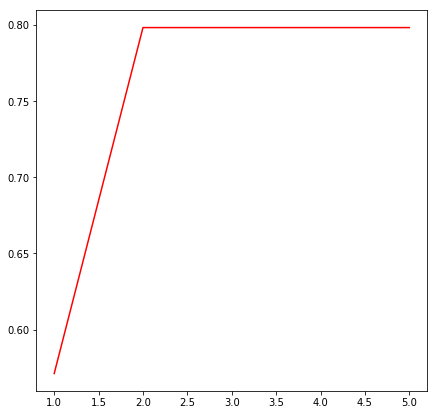

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
with open("Data/histfile.pkl",'rb') as f:
    history = pickle.load(f)
val_loss = history['val_loss']
val_acc = history['val_acc']
loss = history['loss']
acc = history['acc']
plt.figure(1,figsize=[7,7])
epochs = [1,2,3,4,5]

plt.plot(epochs,acc,'r')

In [ ]:
a